<hr>
<h1 style="text-align: center;">Potential Flow</h1>
<hr>

<h3 style="text-align: center;">Nicholas Richmond</h3>
<h3 style="text-align: center;">Student ID: 919578115</h3>
<h3 style="text-align: center;">Project #: 2</h3>
<h3 style="text-align: center;">Date: 11/1/24</h3>

<h3 style="text-align: center;">EAE 127: Applied Aerodynamics</h3>
<h3 style="text-align: center;">University of California, Davis</h3>

<hr>

In [5]:
#standard imports and setups
import pandas as pd #type: ignore
import numpy as np #type: ignore
import os
import matplotlib.pyplot as plt #type: ignore
### JUPYTER NOTEBOOK SETTINGS ########################################
#Plot all figures in full-size cells, no scroll bars
%matplotlib inline
#Disable Python Warning Output
#(NOTE: Only for production, comment out for debugging)
import warnings
warnings.filterwarnings('ignore')
### PLOTTING DEFAULTS BOILERPLATE (OPTIONAL) #########################
#SET DEFAULT FIGURE APPERANCE
import seaborn as sns #Fancy plotting package #type: ignore
#No Background fill, legend font scale, frame on legend
sns.set_theme(style='whitegrid', font_scale=1.5, rc={'legend.frameon': True})
#Mark ticks with border on all four sides (overrides 'whitegrid')
sns.set_style('ticks')
#ticks point in
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
#fix invisible marker bug
sns.set_context(rc={'lines.markeredgewidth': 0.1})
#restore default matplotlib colormap
mplcolors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
sns.set_palette(mplcolors)

#Get color cycle for manual colors
colors = sns.color_palette()
#SET MATPLOTLIB DEFAULTS
#(call after seaborn, which changes some defaults)
params = {
#FONT SIZES
'axes.labelsize' : 30, #Axis Labels
'axes.titlesize' : 30, #Title
'font.size' : 28, #Textbox
'xtick.labelsize': 22, #Axis tick labels
'ytick.labelsize': 22, #Axis tick labels
'legend.fontsize': 24, #Legend font size
'font.family' : 'serif',
'font.fantasy' : 'xkcd',
'font.sans-serif': 'Helvetica',
'font.monospace' : 'Courier',
#AXIS PROPERTIES
'axes.titlepad' : 2*6.0, #title spacing from axis
'axes.grid' : True, #grid on plot
'figure.figsize' : (8,8), #square plots
'savefig.bbox' : 'tight', #reduce whitespace in saved figures
#LEGEND PROPERTIES
'legend.framealpha' : 0.5,
'legend.fancybox' : True,
'legend.frameon' : True,
'legend.numpoints' : 1,
'legend.scatterpoints' : 1,
'legend.borderpad' : 0.1,
'legend.borderaxespad' : 0.1,
'legend.handletextpad' : 0.2,
'legend.handlelength' : 1.0,
'legend.labelspacing' : 0,
}
import matplotlib #type:ignore
matplotlib.rcParams.update(params) #update matplotlib defaults, call after￿
### END OF BOILERPLATE ##################################################
colors = sns.color_palette() #color cycle

## Problem 1: Superposition of Elementary Flows
***1.1: Superposition Plot***

The first problem is about plotting superposition of flows. The elementary flows we will deal with are *freestream flow*, *flow sources*, and *flow sinks*. Each plot will also contain *streamlines*, the *dividing streamline*, and the locations of *sources*, *sinks*, and the *stagnation point*.

The following code simluates a doublet

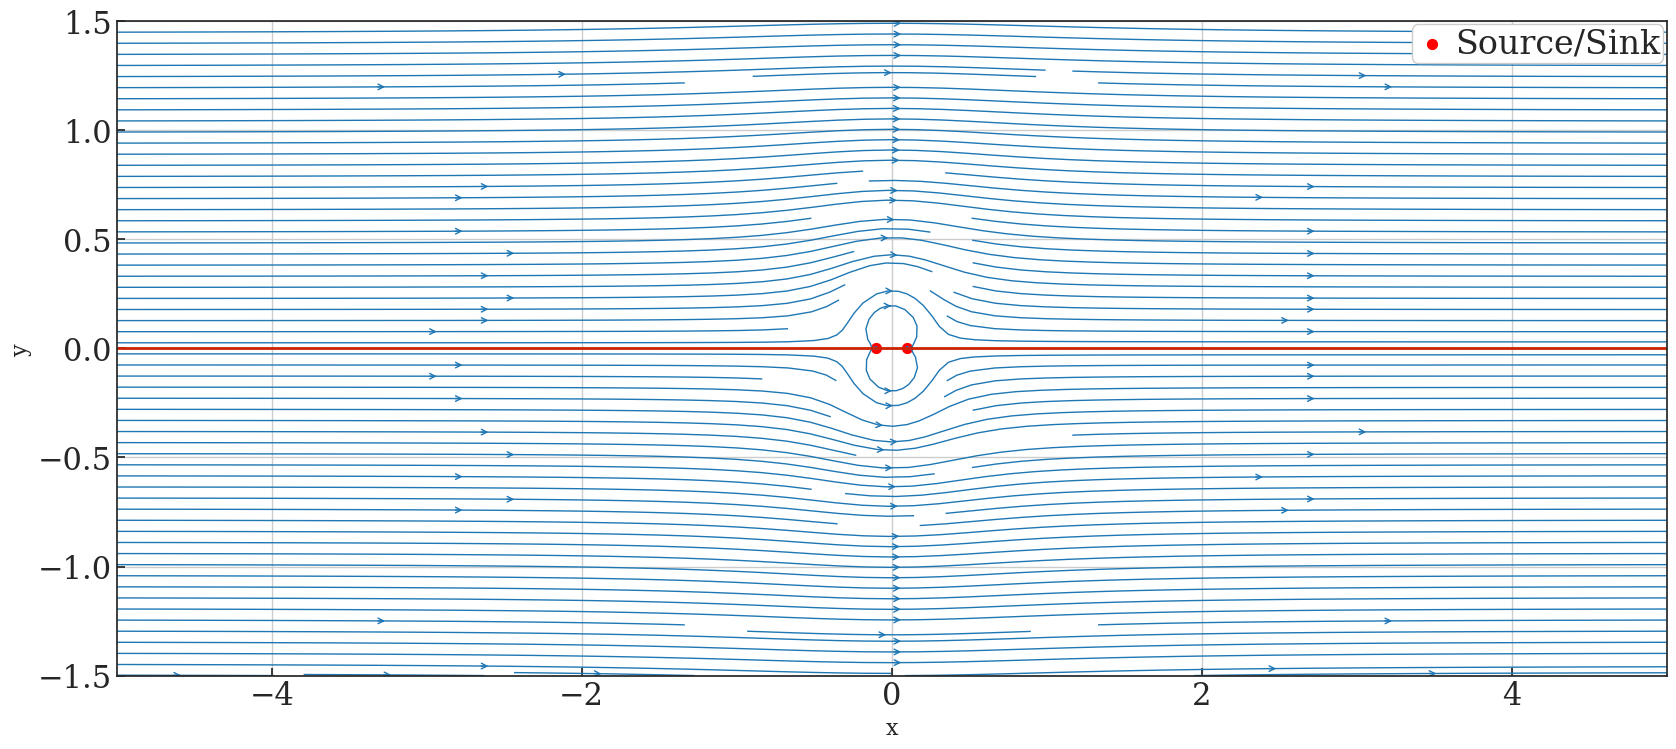

In [86]:
#Plot a doublet using the superposition of a freestream flow, a source, and a sink TODO: add legends

N = 250                                         # Number of points/sections to use in each direction for our flow
x_start, x_end = -5.0, 5.0                      # Boundaries of our flow in the x direction 
y_start, y_end = -1.5, 1.5                      # Boundaries of our flow in the y direction 

# Note, you can adjust the start and end points later to get the best image of your plot / flow

x = np.linspace(x_start, x_end, N)              # 1D array of x points
y = np.linspace(y_start, y_end, N)              # 1D array of y points
X, Y = np.meshgrid(x, y) 

u_inf = 1.2                                    # Freestream flow velocity

# Computing the freestream velocity field
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

# Computing the stream-function
psi_freestream = u_inf * Y


def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    # Here, input the equation for u_source from the equations above
    u = strength / (2 * np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)

    # Here, input the equation for v_source from the equations above
    v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v

def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    # Here, input the equation for psi from the equations above
    psi = strength / (2 * np.pi) * np.arctan2((Y - ys), (X - xs))
    
    return psi

source_strength =  2.5                      # Strength of source singularity
x_source = -0.1                             # X coordinate of source singularity
y_source =  0.0                             # Y coordinate of source singularity        

# Here, we use some simple code to set up information about our source. 
# Next we use the functions above to create the source and sink contributions to u, v and psi. 

u_source, v_source = get_velocity(source_strength, x_source, y_source, X, Y)
psi_source = get_stream_function(source_strength, x_source, y_source, X, Y)

sink_strength = -2.5
x_sink = 0.10

u_sink, v_sink = get_velocity(sink_strength, x_sink, y_source, X, Y)
psi_sink = get_stream_function(sink_strength, x_sink, y_source, X, Y)

# As we can see, the inputs for both functions are the same.

width = 20
height = 8

#plot the potential source
'''
# Here we set up standard plotting functions. 
plt.figure(figsize=(width, height))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)

# Streamplot is a new plotting function that we will use to display the streamlines. 
# Notice that when plotting the freestream flow, we used u_freestream and v_freestream.
# Now we change these values to u_source and v_source. 
plt.streamplot(X, Y, u_source, v_source, density=2, linewidth=1, arrowsize=1, arrowstyle='->')

# We should also add a point to the plot to represent the location of the source. 
# plt.scatter is not specific to our potential flow methods, it is just used to plot a singular point
plt.scatter(x_source, y_source, color = 'red', s = 80, marker ='o')
plt.show()
'''

# Superposition:
U_Total = u_freestream + u_source+u_sink
V_Total = v_freestream + v_source+v_sink
psi_Total = psi_freestream + psi_source+v_source

# The "total" variables now account for the contributions to the flow from both the source and the freestream. 
# We can now plot this the same way we have above. 

width = 20
height = 8.5
# Setting up standard plotting functions once again

plt.figure(figsize=(width, height))

plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)

# Streamplot is a new plotting function that we will use to display the streamlines. 
# Notice that when plotting the freestream flow, now we should use U_Total and V_Total 
plt.streamplot(X, Y, U_Total, V_Total, density=2,linewidth=1, arrowsize=1, arrowstyle='->')

# A new plotting function we will use is contour(), this creates a contour of the flow. 
# We call this contour the *dividing streamline*. This requires an accurate stream function psi.
plt.contour(X, Y, psi_Total, levels=[0], colors='#CD2305', linewidths=2, linestyles='solid');

# We should also a point to the plot to represent the location of the source. 
# Remember that we should do this for every source and sink that we add, and we should make sure to 
# differentiate between sources and sinks when we have both. 
plt.scatter(x_source, y_source, color = 'red', s = 50, marker ='o',label = "Source/Sink")
plt.scatter(x_sink, y_source, color = 'red', s = 50, marker ='o') #y locations of the source and sink are the same, only differ in x

plt.legend(framealpha = 1)

plt.show()

In [ ]:
#define velocity function for the doublet and a function that generates the streamline function for a doublet
def get_velocity_doublet(Kappa, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    Kappa: float
        Strength of the doublet
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    # Here, input the equation for u_source from the equations above
    u = Kappa  * (((X - xs)**2 - (Y - ys)**2))/ (2*np.pi *((X - xs)**2 + (Y - ys)**2)**2)

    # Here, input the equation for v_source from the equations above
    v = Kappa  * (2*(X - xs)* (Y - ys))/ (2*np.pi *((X - xs)**2 + (Y - ys)**2)**2)
    
    return u, v

def get_stream_function_doublet(Kappa, xs, ys, X, Y):

    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    Kappa: float
        Strength of the doublet.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    # Here, input the equation for psi from the equations above
    psi = Kappa * ((Y - ys)) / (2 * np.pi) * ((X - xs)**2 + (Y - ys)**2)
    
    return psi
